In [1]:
# Face landmarks Detection
# usage:
# python facelandmarkdetect.py --shape-predictor shape_predictor_68_face_landmarks.dat --image images/face1.jpg

# import the necessary packages
from imutils import face_utils
import numpy as np
import argparse
import os
import imutils
import dlib
import cv2
import matplotlib.pyplot as plt
import re

## Petunjuk

1. kode berada di folder di atas satu tingkat dari folder sumber gambar

**struktur:**
```
|- kode
|- images/
|-|- 1
|-|-|- 14_1.jpg
|-|-|- 14_2.jpg
```

2. nama variabel folder sumber gambar adalah `images`, jadi folder `images` (atau boleh diganti apapun namanya) harus berisi folder2 yang berisi gambar training.

3. Folder `cropped` adalah folder hasil cropped **pastikan belum ada folder bernama croppped sebelum menjalankan kode**

**Struktur Akhir setelah kode dijalankan:**
```
|- kode
|- images/
|-|- 1
|-|-|- 1_1.jpg
|-|-|- 1_2.jpg
|-|-|- ...
|-|- ...
|- cropped/
|-|- 1
|-|-|- 1_1_0.jpg
|-|-|- 1_1_1.jpg
|-|-|- 1_2_0.jpg
|-|-|- ...
|-|- ...
```


In [14]:
def crop_image(images='images/', saved='cropped/'):
    # initialize dlib's face detector (HOG-based) and then create
    # the facial landmark predictor
    face_detector_path = r'shape_predictor_68_face_landmarks.dat'
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor(face_detector_path)

    # list of error file
    error_file = []
    image_folder_path = os.listdir(images)

    # create folder named cropped
    os.mkdir(saved)

    for folder in image_folder_path:
        folder_path = os.path.join(images, folder)
        image_file = os.listdir(folder_path)
        new_folder_path = os.path.join(saved, folder)
        os.mkdir(new_folder_path)
        
        for image in image_file:
            image_path = os.path.join(folder_path, image)
            new_path = os.path.join(new_folder_path, image)
            # try except for error handling
            try:
                image_load = cv2.imread(image_path)
                #image = imutils.resize(image, width=500)
                gray = cv2.cvtColor(image_load, cv2.COLOR_BGR2GRAY)
                # cv2.imshow('image', gray)
                # cv2.waitKey(0) 
                # cv2.destroyAllWindows() 
                # detect faces in the grayscale image
                
                rects = detector(gray, 1)

                cropped = []
                # loop over the face detections
                for (i, rect) in enumerate(rects):
                    # determine the facial landmarks for the face region, then
                    # convert the facial landmark (x, y)-coordinates to a NumPy
                    # array
                    shape = predictor(gray, rect)
                    shape = face_utils.shape_to_np(shape)

                    # convert dlib's rectangle to a OpenCV-style bounding box
                    # [i.e., (x, y, w, h)], then draw the face bounding box
                    (x, y, w, h) = face_utils.rect_to_bb(rect)

                    RGB_img = cv2.cvtColor(image_load, cv2.COLOR_BGR2RGB)
                    
                    # Crop facial landmark
                    cropped.append(RGB_img[y:y+h, x:x+h])

                    cv2.rectangle(RGB_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
                    print("Start:", end='')
                    print(x, end=',')
                    print(y)
                    print("End:", end='')
                    print(x + w, end=',')
                    print(y + h)

                    #show the face number
                    cv2.putText(RGB_img, "Face #{}".format(i + 1), (x - 10, y - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

                    # #loop over the (x, y)-coordinates for the facial landmarks
                    # #and draw them on the image
                    # for (x, y) in shape:
                    # 	cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

                    # Saving the image
                
                plt.subplot(1,len(cropped)+1,1)
                plt.imshow(RGB_img)
                plt.xticks([])
                plt.yticks([])
                plt.title("Detection")

                z = 0
                for i in cropped:
                    image_name = re.findall(r'[^\/]+(?=\.)', image)[0]
                    new_file = new_path.replace(image_name, image_name+'_'+str(z))

                    # saved_file_name = os.path.join(r'D:\Facial-Landmark-Detection\similarity_test', image.rsplit('.', 1)[0] + "_" +str(z)+'.jpg')
                    #i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
                    print(new_file)
                    print('Original Dimensions : ',i.shape)
                    resized = cv2.resize(i, (150, 150))
                    print('Resized Dimensions : ',resized.shape)
                    plt.imsave(new_file, resized)
                    z = z + 1

                    plt.subplot(1,len(cropped)+1,z+1)
                    plt.imshow(resized)
                    plt.xticks([])
                    plt.yticks([])
                    plt.title("Cropped")

                plt.show()
                pass
            # handling error and append filename to error_file
            except:
                print('\n-------%s ERROR-----------\n' % image_path)
                error_file.append(image_path)
                continue

    return error_file

In [ ]:
# import urllib.request
# ...
# # Download the file from `url` and save it locally under `file_name`:
# url = 'http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2'
# file_name = 'face_detector.dat.bz2'
# urllib.request.urlretrieve(url, file_name)

Start:205,134
End:526,455
cropped/random/face2_0.jpg
Original Dimensions :  (321, 321, 3)
Resized Dimensions :  (150, 150, 3)


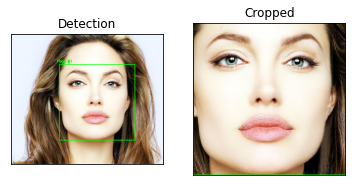

Start:97,118
End:283,304
cropped/random/face3_0.jpg
Original Dimensions :  (186, 186, 3)
Resized Dimensions :  (150, 150, 3)


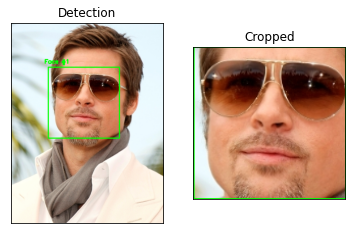

Start:82,142
End:349,409
cropped/random/face1_0.jpg
Original Dimensions :  (267, 267, 3)
Resized Dimensions :  (150, 150, 3)


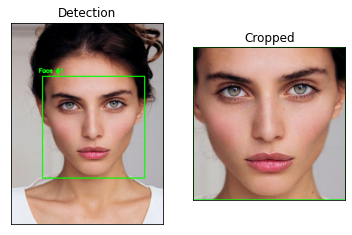

Start:171,172
End:726,726
cropped/17/17_2_0.jpg
Original Dimensions :  (554, 554, 3)
Resized Dimensions :  (150, 150, 3)


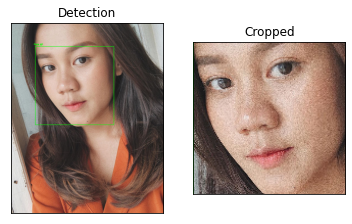

Start:598,99
End:919,420
Start:598,812
End:919,1133
Start:98,812
End:419,1133
Start:98,99
End:419,420
cropped/17/17_3_0.jpg
Original Dimensions :  (321, 321, 3)
Resized Dimensions :  (150, 150, 3)
cropped/17/17_3_1.jpg
Original Dimensions :  (321, 321, 3)
Resized Dimensions :  (150, 150, 3)
cropped/17/17_3_2.jpg
Original Dimensions :  (321, 321, 3)
Resized Dimensions :  (150, 150, 3)
cropped/17/17_3_3.jpg
Original Dimensions :  (321, 321, 3)
Resized Dimensions :  (150, 150, 3)


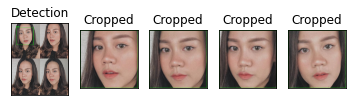

Start:366,531
End:551,717
Start:526,598
End:655,727
cropped/17/17_1_0.jpg
Original Dimensions :  (186, 186, 3)
Resized Dimensions :  (150, 150, 3)
cropped/17/17_1_1.jpg
Original Dimensions :  (129, 129, 3)
Resized Dimensions :  (150, 150, 3)


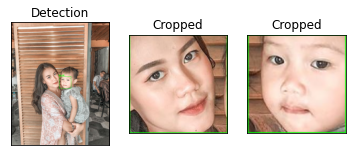

Start:583,655
End:712,784
Start:-44,241
End:312,562
Start:855,669
End:984,798
Start:740,206
End:1061,527
cropped/14/14_3_0.jpg
Original Dimensions :  (129, 129, 3)
Resized Dimensions :  (150, 150, 3)
cropped/14/14_3_1.jpg
Original Dimensions :  (321, 0, 3)

-------images/14/14_3.jpg ERROR-----------

Start:486,96
End:560,171
Start:695,523
End:757,585
cropped/14/14_1_0.jpg
Original Dimensions :  (75, 75, 3)
Resized Dimensions :  (150, 150, 3)
cropped/14/14_1_1.jpg
Original Dimensions :  (62, 62, 3)
Resized Dimensions :  (150, 150, 3)


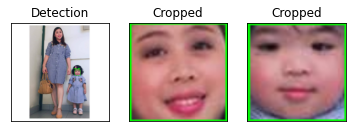

Start:139,345
End:324,531
Start:811,266
End:1034,489
Start:448,366
End:634,552
cropped/14/14_2_0.jpg
Original Dimensions :  (186, 186, 3)
Resized Dimensions :  (150, 150, 3)
cropped/14/14_2_1.jpg
Original Dimensions :  (223, 223, 3)
Resized Dimensions :  (150, 150, 3)
cropped/14/14_2_2.jpg
Original Dimensions :  (186, 186, 3)
Resized Dimensions :  (150, 150, 3)


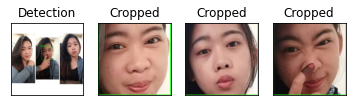

In [15]:
if __name__ == '__main__':
    # define sources folder and saved folder 
    images = 'images/'
    saved = 'cropped/'

    error_file = crop_image(images, saved)
    
    with open('error_file.txt', 'w') as f:
        for nfile in error_file:
            f.write("%s\n" % nfile)

    